## Observations and Insights 

In [22]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
mouse_metadata

study_results = pd.read_csv(study_results_path)
study_results

# # Combine the data into a single dataset
combined_micedata_df =pd.merge(mouse_metadata, study_results, on= "Mouse ID") 
combined_micedata_df.head()

# Display the data table for preview


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
mice_count=combined_micedata_df["Mouse ID"].nunique
mice_count()

249

In [4]:
combined_micedata_df.shape

(1893, 8)

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
combined_micedata_df.duplicated(subset=['Mouse ID','Timepoint' ]).sum()


5

In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_data=combined_micedata_df.drop_duplicates(subset=['Mouse ID','Timepoint' ])
clean_mouse_data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Optional: Get all the data for the duplicate mouse ID.
 



In [8]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_count =clean_mouse_data["Mouse ID"].nunique
clean_mouse_count()

249

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

micegroup_df = combined_micedata_df.groupby('Drug Regimen')
# micegroup_df
tumor_mean = micegroup_df['Tumor Volume (mm3)'].mean()
# tumor_mean
tumor_median = micegroup_df['Tumor Volume (mm3)'].median()
# tumor_median
tumor_stdev = micegroup_df['Tumor Volume (mm3)'].std()
# tumor_stdev
tumor_sem =micegroup_df['Tumor Volume (mm3)'].sem()
# tumor_sem

summary_grouped_df = pd.DataFrame({'Mean':tumor_mean, 'Median':tumor_median, 'Standard Deviation':tumor_stdev, 'SEM':tumor_sem})
summary_grouped_df.head(10)

,Mean,Median,Standard Deviation,SEM
Drug Regimen,,,,
Capomulin,40.675741,41.557809,4.994774,0.329346
Ceftamin,52.591172,51.776157,6.268188,0.469821
Infubinol,52.884795,51.820584,6.567243,0.492236
Ketapril,55.235638,53.698743,8.279709,0.603860
Naftisol,54.331565,52.509285,8.134708,0.596466
Placebo,54.033581,52.288934,7.821003,0.581331
Propriva,52.322552,50.854632,6.507770,0.512884
Ramicane,40.216745,40.673236,4.846308,0.320955
Stelasyn,54.233149,52.431737,7.710419,0.573111


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for
# each regimen

# Using the aggregation method, produce the same summary statistics in a single line

In [11]:
micegroup_df['Tumor Volume (mm3)'].agg(['mean', 'median'])



,mean,median
Drug Regimen,,
Capomulin,40.675741,41.557809
Ceftamin,52.591172,51.776157
Infubinol,52.884795,51.820584
Ketapril,55.235638,53.698743
Naftisol,54.331565,52.509285
Placebo,54.033581,52.288934
Propriva,52.322552,50.854632
Ramicane,40.216745,40.673236
Stelasyn,54.233149,52.431737


## Bar and Pie Charts

In [12]:
regimen_group = combined_micedata_df.groupby("Drug Regimen")
regimen_group
summary_regimen = regimen_group["Tumor Volume (mm3)"].mean()
summary_regimen

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.322552
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

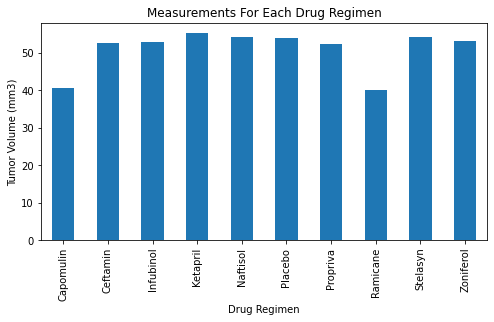

<Figure size 432x288 with 0 Axes>

In [13]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
summary_regimen.plot(kind = 'bar', figsize=(8,4))
plt.title('Measurements For Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Tumor Volume (mm3)')
plt.show()
plt.tight_layout()


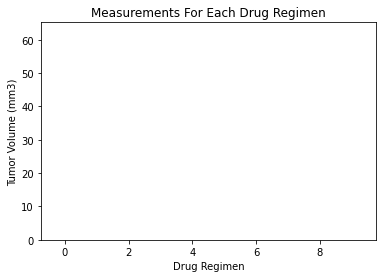

In [66]:
drug_regimen = ['Capomulin','Ceftamin','Infubinol','Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane',
                'Stelasyn', 'Zoniferol'  ]
tumor_volume = [40.67, 52.59, 52.88, 55.23, 54.33, 54.03, 52.32, 40.21, 54.23, 53.23]

x_axis = np.arange(10, len(drug_regimen))
tick_locations =[]
for x in x_axis:
    tick_locations.append(x)
    
plt.title('Measurements For Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Tumor Volume (mm3)')

plt.xlim(-0.75, len(drug_regimen)-.25)
plt.ylim(0, max(tumor_volume) +10)

plt.show()


In [14]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.



In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
micegender_df= combined_micedata_df['Sex'].value_counts()
micegender_df

Male      958
Female    935
Name: Sex, dtype: int64

(-1.1045613723658971,
 1.1002172082078998,
 -1.105172849624489,
 1.1027130801595115)

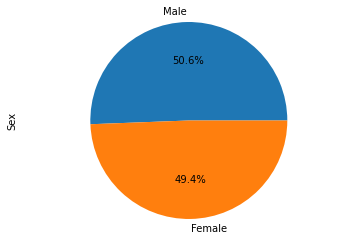

In [16]:
micegender_df= combined_micedata_df['Sex'].value_counts()
plt.figure()
micegender_df.plot(kind="pie", autopct="%1.1f%%",)
plt.axis("equal")



(-1.1756979042636164,
 1.1282937402085897,
 -1.1918349098573184,
 1.1259794268614327)

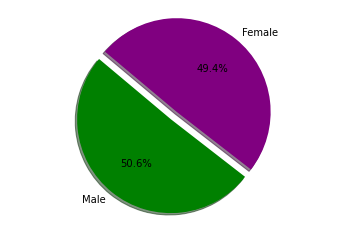

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
genders = ["Male", "Female"]
Gender_count = [958,935]
colors = ["green","purple","pink"]
explode = (0.1,0)

plt.pie(Gender_count, explode=explode, labels=genders, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")

## Quartiles, Outliers and Boxplots

In [51]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
micetumor_df = combined_micedata_df.groupby('Mouse ID')['Timepoint'].max()
micetumor_df

# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


Mouse ID
a203    45
a251    45
a262    45
a275    45
a366    30
        ..
z435    10
z578    45
z581    45
z795    45
z969    45
Name: Timepoint, Length: 249, dtype: int64

In [54]:
trmnt = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']
trmnt_values =[]

In [55]:
# Put treatments into a list for for loop (and later for plot labels)
for trmnt in trmnt:
    trmnt_df = combined_micedata_df.loc[combined_micedata_df['Drug Regimen']==trmnt]


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [56]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_df = combined_micedata_df.loc[combined_micedata_df['Drug Regimen']=='Capomulin']
capomulin_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


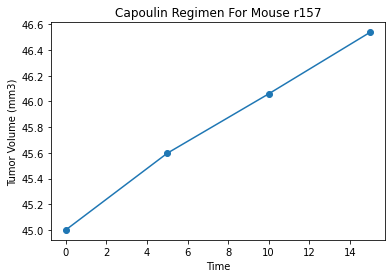

In [59]:
capomulin_mouse = combined_micedata_df.loc[combined_micedata_df['Mouse ID']=='r157']
plt.plot(capomulin_mouse["Timepoint"], capomulin_mouse['Tumor Volume (mm3)'], marker ='o')

plt.title("Capoulin Regimen For Mouse r157")
plt.xlabel ("Time")
plt.ylabel('Tumor Volume (mm3)')
plt.show()

In [85]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_df = combined_micedata_df.loc[combined_micedata_df['Drug Regimen']=='Capomulin']
average_tumor = capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
average_tumor

merged_volume_df = pd.merge(capomulin_df, average_tumor, on = 'Mouse ID')
merged_volume_df

# final_volume = merged_volume_df[['Weight (g)','Tumor Volume (mm3)']]
# final_volume

# # x =
# # y =


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3)_x,Metastatic Sites,Tumor Volume (mm3)_y
0,s185,Capomulin,Female,3,17,0,45.000000,0,34.559143
1,s185,Capomulin,Female,3,17,5,43.878496,0,34.559143
2,s185,Capomulin,Female,3,17,10,37.614948,0,34.559143
3,s185,Capomulin,Female,3,17,15,38.177232,0,34.559143
4,s185,Capomulin,Female,3,17,20,36.866876,0,34.559143
...,...,...,...,...,...,...,...,...,...
225,i557,Capomulin,Female,1,24,45,47.685963,1,44.805810
226,r157,Capomulin,Male,22,25,0,45.000000,0,45.798970
227,r157,Capomulin,Male,22,25,5,45.597064,0,45.798970
228,r157,Capomulin,Male,22,25,10,46.059608,0,45.798970


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
